In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("data_student_augmented.csv")

In [13]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [14]:
df.isna().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64

In [15]:
df.shape

(300, 6)

In [16]:
d=df.duplicated().sum()
print(d)

0


In [17]:
df.dtypes

STG     float64
SCG     float64
STR     float64
LPR     float64
PEG     float64
 UNS     object
dtype: object

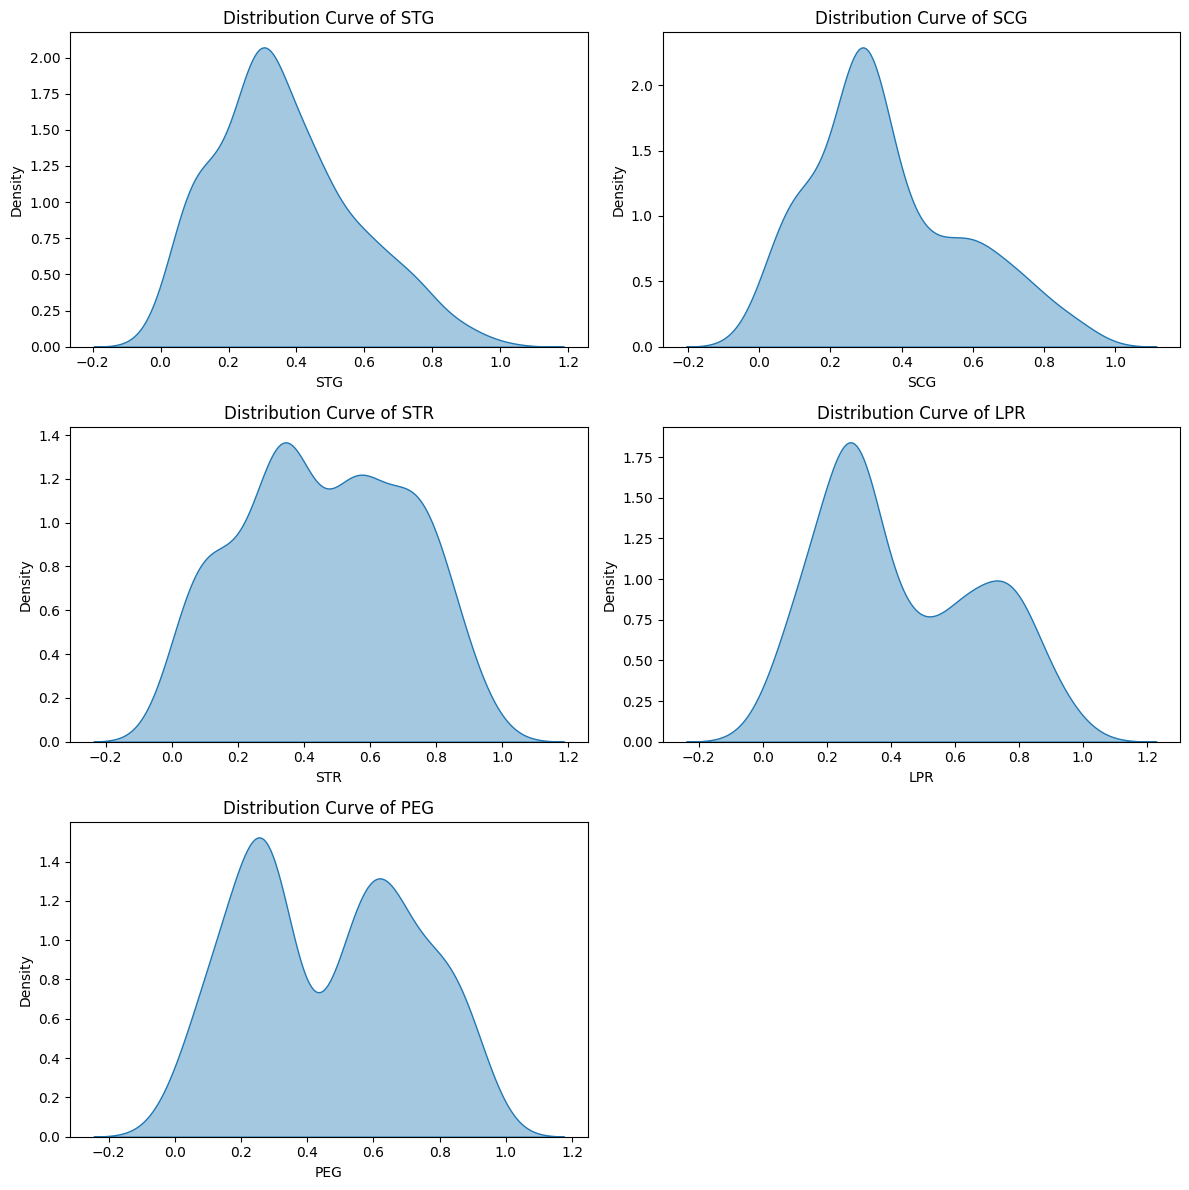

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv("data_student_augmented.csv")
numeric_df = df.select_dtypes(include=['int64','float64'])

n_cols = 2
n_rows = math.ceil(len(numeric_df.columns) / n_cols)

plt.figure(figsize=(12, 4*n_rows))
for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=numeric_df, x=col, fill=True, alpha=0.4)
    plt.title(f"Distribution Curve of {col}")
plt.tight_layout()
plt.show()


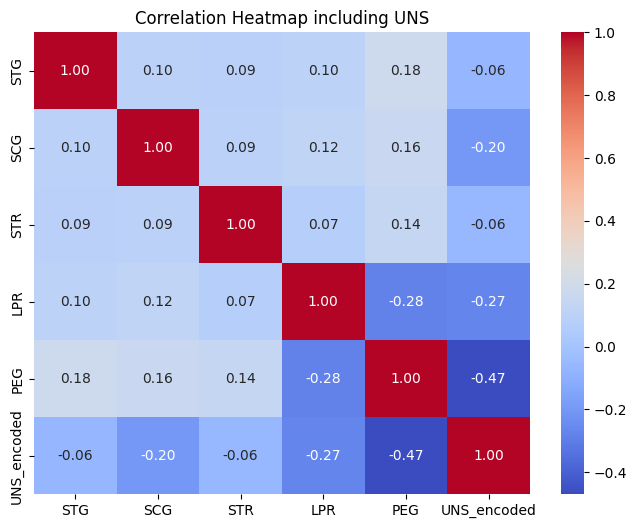

In [19]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("data_student_augmented.csv")
df.rename(columns=lambda x: x.strip(), inplace=True)
le = LabelEncoder()
df["UNS_encoded"] = le.fit_transform(df["UNS"])
numeric_df = df.select_dtypes(include=["float64", "int64"])
corr = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap including UNS")
plt.show()


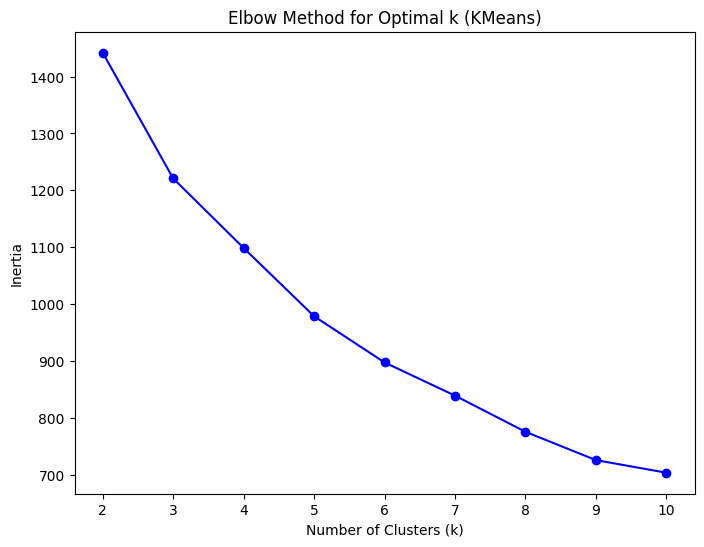

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("data_student_augmented.csv")
if "UNS" in df.columns:
    df = df.drop(columns=["UNS"])

for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k (KMeans)")
plt.show()


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch
import plotly.express as px
import joblib

df = pd.read_csv("data_student_augmented.csv")

if "UNS" in df.columns:
    df = df.drop("UNS", axis=1)

for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

scaler = StandardScaler()
student_scaled = scaler.fit_transform(df)


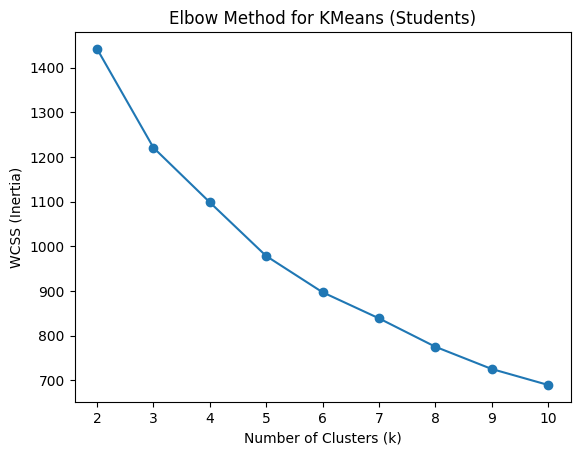

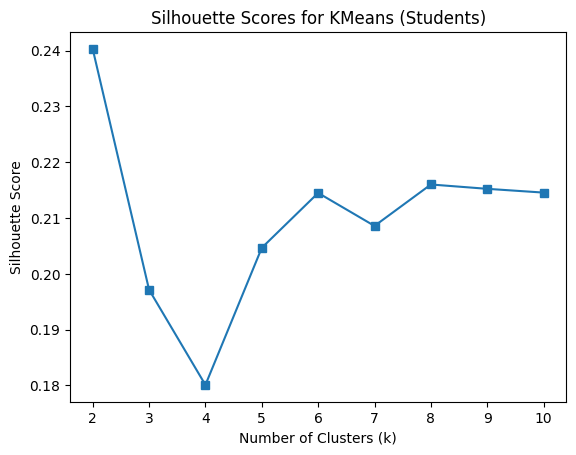

Best K for KMeans: 2, Silhouette Score: 0.2403


In [5]:
inertias = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    km.fit(student_scaled)
    inertias.append(km.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method for KMeans (Students)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.show()

sil_scores = []
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(student_scaled)
    sil_scores.append(silhouette_score(student_scaled, labels))

plt.plot(K_range, sil_scores, marker='s')
plt.title("Silhouette Scores for KMeans (Students)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

optimal_k = K_range[np.argmax(sil_scores)]
print(f"Best K for KMeans: {optimal_k}, Silhouette Score: {max(sil_scores):.4f}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
df["KMeans_Cluster"] = kmeans.fit_predict(student_scaled)


Silhouette Score: 0.19513408295847487
Calinski-Harabasz Score: 63.69343696723338
Davies-Bouldin Score: 1.5751013946856025


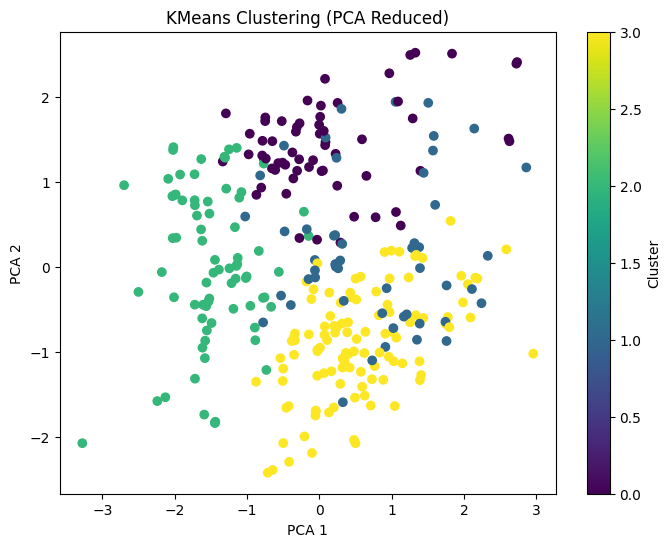

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv("data_student_augmented.csv")
df.columns = df.columns.str.strip()
df = df.drop(columns=["UNS"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=4, random_state=42, tol=1e-4)
labels = kmeans.fit_predict(X_scaled)

silhouette = silhouette_score(X_scaled, labels)
calinski = calinski_harabasz_score(X_scaled, labels)
davies = davies_bouldin_score(X_scaled, labels)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski)
print("Davies-Bouldin Score:", davies)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clustering (PCA Reduced)")
plt.colorbar(scatter, label="Cluster")
plt.show()


Silhouette Score: 0.16798444513960573
Calinski-Harabasz Score: 51.91651269073788
Davies-Bouldin Score: 1.6485142039022567


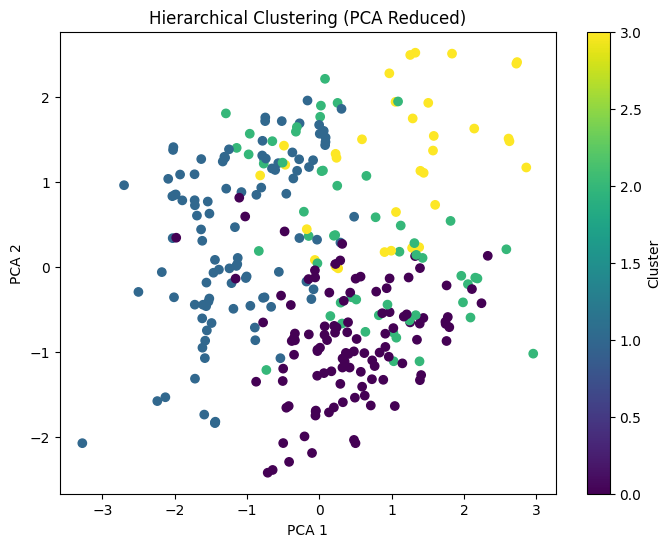

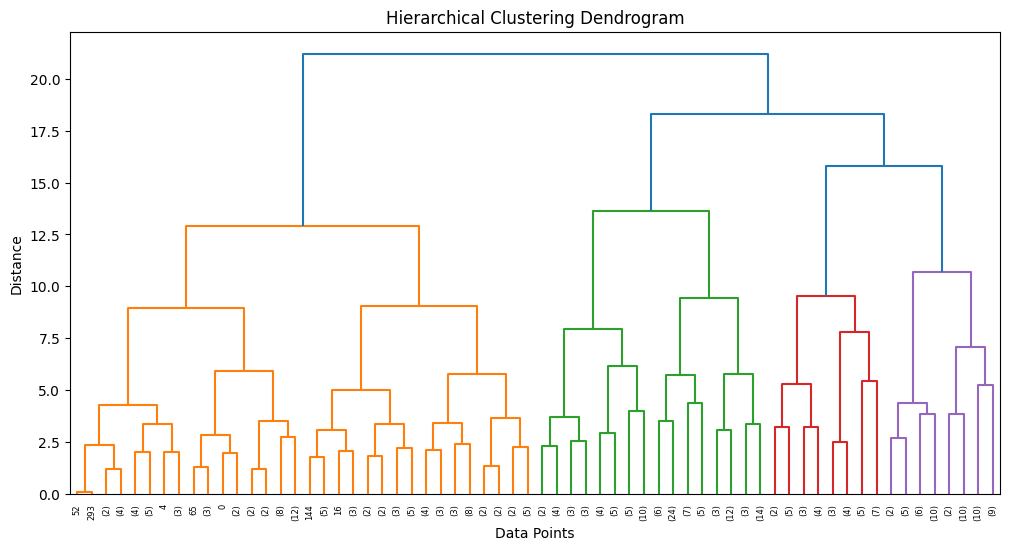

In [23]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

df = pd.read_csv("data_student_augmented.csv")
df.columns = df.columns.str.strip()
df = df.drop(columns=["UNS"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

hier = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels = hier.fit_predict(X_scaled)

silhouette = silhouette_score(X_scaled, labels)
calinski = calinski_harabasz_score(X_scaled, labels)
davies = davies_bouldin_score(X_scaled, labels)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski)
print("Davies-Bouldin Score:", davies)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Hierarchical Clustering (PCA Reduced)")
plt.colorbar(scatter, label="Cluster")
plt.show()

linked = linkage(X_scaled, method="ward")

plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


Silhouette Score: 0.5128348931641361
Calinski-Harabasz Score: 38.67920351389408
Davies-Bouldin Score: 0.646417025713599


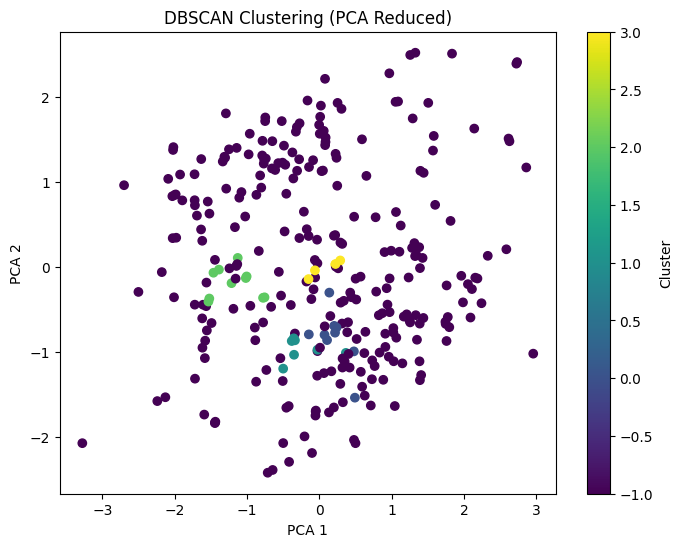

In [22]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv("data_student_augmented.csv")
df.columns = df.columns.str.strip()
df = df.drop(columns=["UNS"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

dbscan = DBSCAN(eps=0.7, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

mask = labels != -1
if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_scaled[mask], labels[mask])
    calinski = calinski_harabasz_score(X_scaled[mask], labels[mask])
    davies = davies_bouldin_score(X_scaled[mask], labels[mask])
    print("Silhouette Score:", silhouette)
    print("Calinski-Harabasz Score:", calinski)
    print("Davies-Bouldin Score:", davies)
else:
    print("DBSCAN still formed a single cluster, try adjusting eps/min_samples")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("DBSCAN Clustering (PCA Reduced)")
plt.colorbar(scatter, label="Cluster")
plt.show()


In [25]:
import joblib

joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']